# KNN From Sratch

In this workbook we will guide you through the steps to implement KNN from scratch. Once this is done you'll implement you solution in a class that is tested with the knn_class_tester notebook.

1. Use the ```make_blobs``` function from SKLearn to make a dataset to test your KNN functions.
2. Create helper functions. These will be useful when you go to implement your class.
    - Squaring the difference of two vectors.
    - Summing the square differences and returning the square root.
    - Calculating the euclidian distances
    - An evaluation function to evalaute predictions
3. Create the KNN predcit function

In [2]:
#import libraries
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

### Step 1: Create a sample dataset
1. Use ```make_blobs``` to create a sample set
2. Start with 300 samples, 4 centres, 0.6 standard deviation, and random state 0
3. Plot the samples

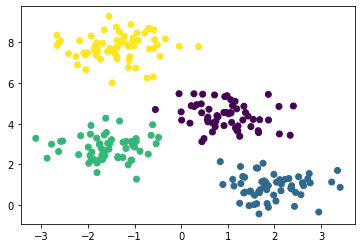

In [34]:
#make the dataset with make_blobs
#your code here
from sklearn.model_selection import train_test_split
X,y = make_blobs(n_samples=300,centers=4,cluster_std=0.6,random_state=0)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=0)
x1 = X_train[:,0]
x2 = X_train[:,1]
plt.scatter(x1,x2,c=y_train)






In [ ]:
K = 3


def eucl_dis(v1,v2):
    return np.array(np.linalg.norm(v1 - v2))

def predict(X_test):
    predictions = []
    for i in range(len(X_test)):
        dist = np.array([eucl_dis(X_test[i], x_train) for x_train in X_train])
        dist_sort = dist.argsort()[:K]
        print(dist_sort)

### Step 2: Create the helper functions
1. Implement ```square_diff``` that takes in two vectors ```x1``` and ```x2``` and returns their squared difference. Hint: Use ```assert``` to check their lenghts match.
2. Implement ```root_sum_squared``` that takes in a vector of squaerd differences and returns the square root of the summed elements.
3. Implement ```euclidean_distances``` that takes in feature and prediction vectors and computes the distances. *Hint:* ```np.linalg.norm```
4. Implement ```evaluate``` that takes in ```y_hat``` and ```y_true``` (classifications of the blobs)and returns the accruacy of the KNN predict function.

In [37]:
#implement square diff
# your code here
def square_diff(x1,x2):
    diff = np.square(x1-x2)
    return diff

In [36]:
#implement root sum squares
#your code here
def root_sum_squared(a):
    return np.sqrt(sum(a))

In [48]:
#implement the euclidean distances function
#your code here
def euc_dist(v1,v2):
    dist = np.linalg.norm(v1 - v2)
    return dist


In [61]:
#implement the evaluate function
#your code here
def evaluate(y_hat,y_true):
    score = 0
    for i in range(len(y_hat)):
        if y_true[i] == y_hat[i]:
            score += 1
    accuracy = score / len(y_true) * 100
    return accuracy


### Step 3: Create the KNN prediction function
The KNN prediction function as the following steps
1. For each row in ```X``` calcuate the euclidian distance of each row to the target vector.
2. Combine the distances array with the target classifers array y.
3. Sort the array and select the k lowest pairs and get the categorical values of the k nearest and put in a list
4. Count the highest votes and update the highest voted class to y_hat

In [54]:
#implement the predict function
#your code here
def predict(X_test,K):   
    # list to store all our predictions
    predictions = []
        
    # loop over all observations in the test set
    for i in range(len(X_test)):            
            
        # calculate the distance between the test point and all other points in the training set
        dist = np.array([euc_dist(X_test[i], x_t) for x_t in X_train])
            
        # sort the distances and return the indices of K neighbors
        dist_sorted = dist.argsort()[:K]
            
        # get the neighbors
        neigh_count = {}
 
        # for each neighbor find the class
        for idx in dist_sorted:
            if y_train[idx] in neigh_count:
                neigh_count[y_train[idx]] += 1
            else:
                neigh_count[y_train[idx]] = 1

        sorted_neigh_count = sorted(neigh_count.items(), key=lambda x: x[1], reverse=True)
        predictions.append(sorted_neigh_count[0][0])    
   
    return predictions


In [59]:
predictions = predict(X_test, K=3)

In [62]:
print('Accuracy {:0.2f}%'.format(evaluate(predictions, y_test)))

Accuracy 100.00%
